In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('train.csv')

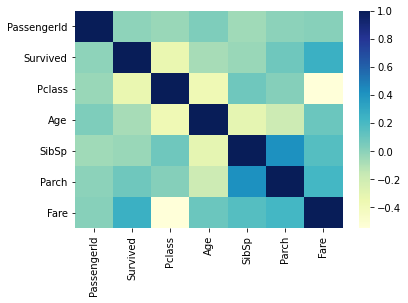

In [3]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

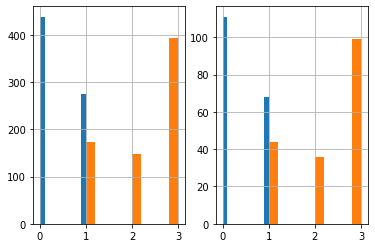

In [5]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

#this is to check if the train and test have similar distribution or not

In [6]:
c
#to check if any missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 792 to 744
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [7]:
#fix age, no need to fix cabin as we don't need that info
#estimater
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self,X, y=None):
        return self
    
    def transform(Self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [8]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names =["Female", "Male"]   
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X    

In [9]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Emabarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [11]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [12]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,C,S,Q,Female,Male
792,793,0,3,29.631877,8,2,69.5500,S,0.0,0.0,1.0,1.0,0.0
761,762,0,3,41.000000,0,0,7.1250,S,0.0,0.0,1.0,0.0,1.0
234,235,0,2,24.000000,0,0,10.5000,S,0.0,0.0,1.0,0.0,1.0
471,472,0,3,38.000000,0,0,8.6625,S,0.0,0.0,1.0,0.0,1.0
350,351,0,3,23.000000,0,0,9.2250,S,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,3,33.000000,3,0,15.8500,S,0.0,0.0,1.0,1.0,0.0
412,413,1,1,33.000000,1,0,90.0000,Q,0.0,1.0,0.0,1.0,0.0
74,75,1,3,32.000000,0,0,56.4958,S,0.0,0.0,1.0,0.0,1.0
689,690,1,1,15.000000,0,1,211.3375,S,0.0,0.0,1.0,1.0,0.0


In [13]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 792 to 744
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     711 non-null    object 
 8   C            712 non-null    float64
 9   S            712 non-null    float64
 10  Q            712 non-null    float64
 11  Female       712 non-null    float64
 12  Male         712 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 77.9+ KB


In [15]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
                         
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

ValueError: could not convert string to float: 'S'

In [ ]:
X_data